# Start

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file
df=pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#Inspecting the statistics
df. describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.shape

(167, 10)

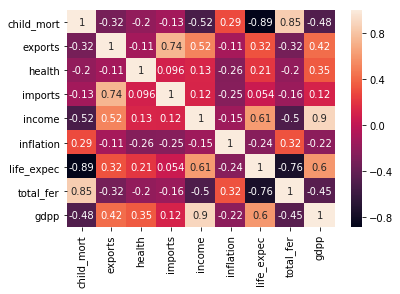

In [7]:
#Checking the correlation between the variables
sns.heatmap(df.corr(),annot=True)

#### Income-Life Expectancy ,Exports-Imports ,Income-GDPP are some of the highest correlated variables along with others

### Normalising to a desired common scale

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]=scaler.fit_transform(df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### To get rid of high correlation ,we'll perform dimensionality reduction using PCA

In [11]:
from sklearn.decomposition import PCA
pca=PCA(svd_solver='auto')

In [12]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [13]:
#Fitting the model
pca.fit(df.iloc[:,1:]) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#Inspecting the components formed
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [15]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

#### Checking the optimum number of principal components based on cummulative variance explained

Text(0,0.5,'Cumulative explained variance')

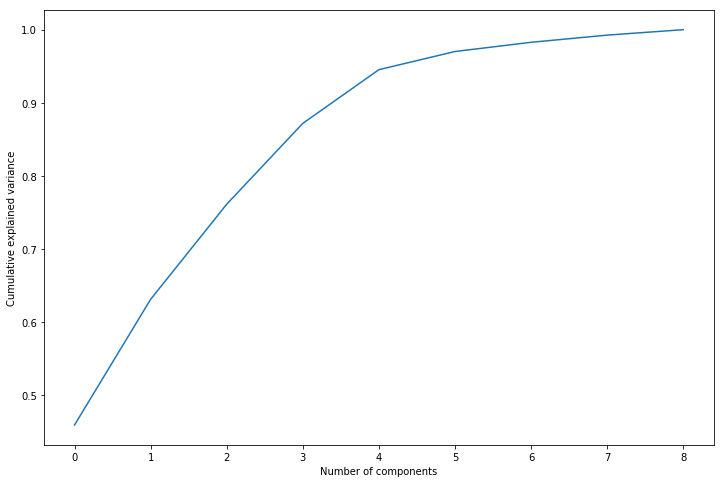

In [16]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### We'll choose number 4 as it explains 90% of the variance of this normalised data

In [17]:
#Performing Incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=4)

In [18]:
df_pca=pca_final.fit_transform(df.iloc[:,1:])
df_pca.shape

(167, 4)

In [19]:
corrmat=np.corrcoef(df_pca.transpose())

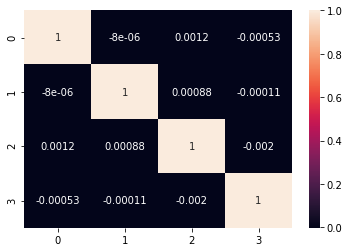

In [20]:
sns.heatmap(corrmat,annot=True)

In [21]:
corrmat_nodiag=corrmat-np.diagflat(corrmat.diagonal())

In [22]:
# Inspecting maximum and minimum correlation after pca
print("max correlation :",corrmat_nodiag.max()," ,min correlation :",corrmat_nodiag.min())

max correlation : 0.0011961925092544112  ,min correlation : -0.002037829535552029


#### Clearly the correlations have decresed as expected from the PCA

In [23]:
df_pca

array([[-2.91378654e+00,  8.83538878e-02,  7.21003195e-01,
         9.96698978e-01],
       [ 4.29357566e-01, -5.87858991e-01,  3.21052324e-01,
        -1.17119280e+00],
       [-2.82988288e-01, -4.46657168e-01, -1.22513541e+00,
        -8.50127000e-01],
       [-2.93096861e+00,  1.69943654e+00, -1.52173450e+00,
         8.75966440e-01],
       [ 1.03198760e+00,  1.30488006e-01,  1.92922430e-01,
        -8.44808058e-01],
       [ 2.84700248e-02, -1.75672051e+00, -7.93519995e-01,
        -5.24863850e-02],
       [-1.02848921e-01, -5.67475881e-01, -2.77668852e-01,
        -1.45832104e+00],
       [ 2.33945555e+00, -1.99811958e+00, -2.37052010e-01,
         1.13249032e+00],
       [ 2.97385881e+00, -7.34849467e-01,  5.48420918e-01,
         1.19256083e+00],
       [-1.80005999e-01, -3.93752233e-01, -8.64255214e-01,
        -4.26656606e-01],
       [ 1.26607427e+00, -6.65087633e-01,  4.53533102e-01,
         5.94788468e-02],
       [ 1.67073708e+00,  5.60394035e-01, -1.02016832e+00,
      

In [24]:
#Creating the dataframe
df_pca=pd.DataFrame({'PC1': df_pca[:,0],'PC2': df_pca[:,1],'PC3': df_pca[:,2],'PC4': df_pca[:,3]})

In [25]:
#adding the country column for reference
df_pca['country']=df['country']
df_pca

,PC1,PC2,PC3,PC4,country
0,-2.913787,0.088354,0.721003,0.996699,Afghanistan
1,0.429358,-0.587859,0.321052,-1.171193,Albania
2,-0.282988,-0.446657,-1.225135,-0.850127,Algeria
3,-2.930969,1.699437,-1.521734,0.875966,Angola
4,1.031988,0.130488,0.192922,-0.844808,Antigua and Barbuda
5,0.028470,-1.756721,-0.793520,-0.052486,Argentina
6,-0.102849,-0.567476,-0.277669,-1.458321,Armenia
7,2.339456,-1.998120,-0.237052,1.132490,Australia
8,2.973859,-0.734849,0.548421,1.192561,Austria
9,-0.180006,-0.393752,-0.864255,-0.426657,Azerbaijan


In [26]:
# Changing the position of the country column(clarity further)
cols = df_pca.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_pca=df_pca[cols]

In [27]:
df_pca

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321
7,Australia,2.339456,-1.998120,-0.237052,1.132490
8,Austria,2.973859,-0.734849,0.548421,1.192561
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657


### Now we'll check for outliers and remove them if present

Text(0.5,1,'PC4')

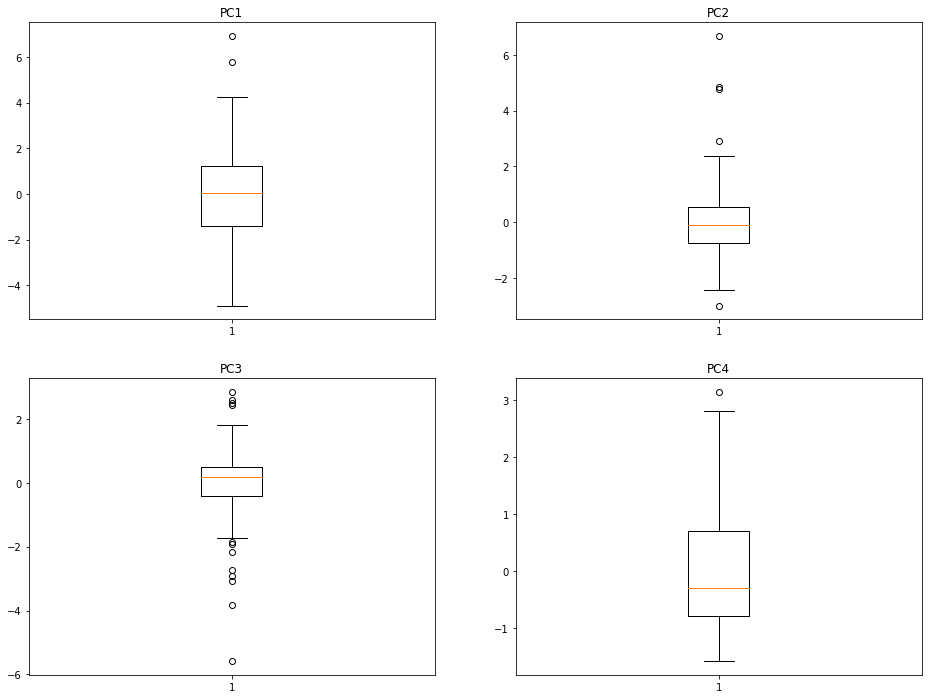

In [28]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.boxplot(df_pca['PC1'])
plt.title('PC1')
plt.subplot(2,2,2)
plt.boxplot(df_pca['PC2'])
plt.title('PC2')
plt.subplot(2,2,3)
plt.boxplot(df_pca['PC3'])
plt.title('PC3')
plt.subplot(2,2,4)
plt.boxplot(df_pca['PC4'])
plt.title('PC4')


In [29]:
#Removing outliers using "1.5*IQR" rule
Q1=df_pca.quantile(.25)

In [30]:
Q3=df_pca.quantile(.75)
IQR=Q3-Q1

In [31]:
print((df_pca.iloc[:,1:]<Q1-1.5*IQR)|(df_pca.iloc[:,1:]>1.5*IQR))

       PC1    PC2    PC3    PC4
0    False  False  False  False
1    False  False  False  False
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
5    False  False  False  False
6    False  False  False  False
7    False  False  False  False
8    False  False  False  False
9    False  False  False  False
10   False  False  False  False
11   False  False  False  False
12   False  False  False  False
13   False  False  False  False
14   False  False  False  False
15   False  False  False  False
16   False  False  False  False
17   False  False  False  False
18   False  False  False  False
19   False  False  False  False
20   False  False   True  False
21   False  False  False  False
22   False  False  False  False
23   False  False   True  False
24   False  False  False  False
25   False  False  False  False
26   False  False   True  False
27   False  False  False  False
28   False  False  False  False
29   False  False  False  False
..     .

In [32]:
#Getting the dataframe without outliers
df_pca_out=df_pca[~((df_pca.iloc[:,1:]<(Q1-1.5*IQR))|(df_pca.iloc[:,1:]>(Q3+1.5*IQR))).any(axis=1)]

In [33]:
df_pca_out

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699
1,Albania,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321
7,Australia,2.339456,-1.998120,-0.237052,1.132490
8,Austria,2.973859,-0.734849,0.548421,1.192561
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657


### Hopkin's Statistic

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_pca_out.iloc[:,1:])

0.7783184470206276

#### The value indicates a good clustering tendency of the data

In [36]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

### Silhouette Score

In [37]:
from sklearn.metrics import silhouette_score
sse_=[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k).fit(df_pca_out.iloc[:,1:])
    sse_.append([k,silhouette_score(df_pca_out.iloc[:,1:],kmeans.labels_)])

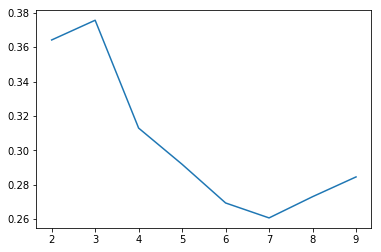

In [38]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

#### We'll choose K=4

In [39]:
# Instantiating and fitting the model
model_cluster=KMeans(n_clusters=4,max_iter=40)
model_cluster.fit(df_pca_out.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=40,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
#Getting the labels into a separate dataframe for merging
labels=pd.DataFrame(pd.Series(model_cluster.labels_))
labels.index=df_pca_out.index

In [41]:
df_km=pd.merge(df_pca_out,labels,how='outer',left_index=True,right_index=True)
df_km.columns=['country','PC1','PC2','PC3','PC4','Cluster ID']

In [42]:
df_km #Dataframe with cluster id for each country as a separate column

,country,PC1,PC2,PC3,PC4,Cluster ID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1
1,Albania,0.429358,-0.587859,0.321052,-1.171193,3
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0
3,Angola,-2.930969,1.699437,-1.521734,0.875966,1
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,3
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,0
7,Australia,2.339456,-1.998120,-0.237052,1.132490,2
8,Austria,2.973859,-0.734849,0.548421,1.192561,2
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,0


In [43]:
Final_df=pd.merge(df_km,df.iloc[:,1:],how='outer',left_index=True,right_index=True)
Final_df #Adding the original columns to compare means of various parameters of the clusters formed

,country,PC1,PC2,PC3,PC4,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,1.0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,0.429358,-0.587859,0.321052,-1.171193,3.0,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,0.0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,-2.930969,1.699437,-1.521734,0.875966,1.0,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,3.0,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,0.0,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,0.0,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,2.339456,-1.998120,-0.237052,1.132490,2.0,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,2.973859,-0.734849,0.548421,1.192561,2.0,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,0.0,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


In [44]:
km_cluster_child_mort=pd.DataFrame(Final_df.groupby('Cluster ID').child_mort.mean()) #Calculating means

In [45]:
km_cluster_life_expec=pd.DataFrame(Final_df.groupby('Cluster ID').life_expec.mean())

In [46]:
km_cluster_health=pd.DataFrame(Final_df.groupby('Cluster ID').health.mean())

In [47]:
cluster_df=pd.concat([pd.Series([0,1,2,3]),km_cluster_child_mort,km_cluster_life_expec,km_cluster_health],axis=1)

In [48]:
cluster_df.columns=['Cluster ID','Child Mortality Mean','Life Expectancy Mean','Health']
cluster_df #Dataframe showing cluster ids and means of least correlated variables

,Cluster ID,Child Mortality Mean,Life Expectancy Mean,Health
0,0,-0.194377,0.132136,-0.517381
1,1,1.405998,-1.291743,-0.270418
2,2,-0.849400,1.169615,1.215460
3,3,-0.545753,0.348244,-0.011240


### Visualising the results of K-Means

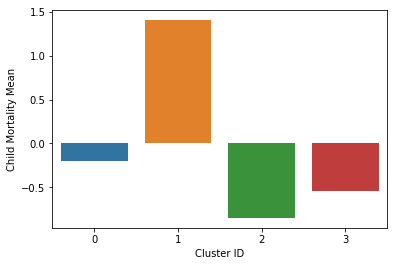

In [49]:
sns.barplot(x=cluster_df['Cluster ID'],y=cluster_df['Child Mortality Mean'])

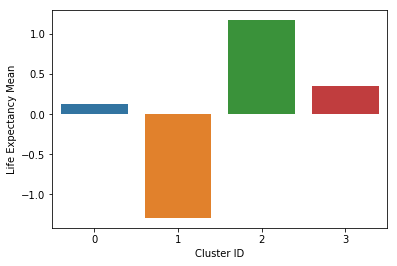

In [50]:
sns.barplot(x=cluster_df['Cluster ID'],y=cluster_df['Life Expectancy Mean'])

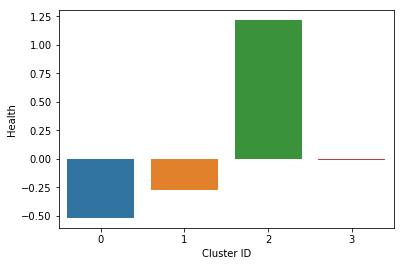

In [51]:
sns.barplot(x=cluster_df['Cluster ID'],y=cluster_df['Health'])

### Hierarchical Clustering

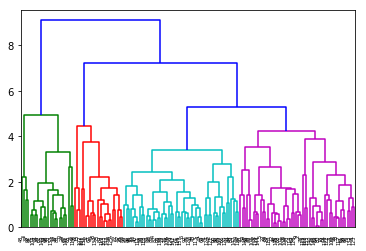

In [52]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings=linkage(df_pca_out.iloc[:,1:],method='complete',metric='euclidean')
dendrogram(mergings,color_threshold=5)
plt.show()

In [53]:
clusterCut = pd.DataFrame(pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,)))

In [54]:
clusterCut.index=df_pca_out.index #Matching the index for correct merging

In [55]:
df_hc = pd.merge(df_pca_out,clusterCut,how='outer',left_index=True,right_index=True)

In [56]:
df_hc.columns=['country','PC1','PC2','PC3','PC4','Cluster ID']

In [57]:
df_hc #Dataframe obtained from hierarchichal clustering

,country,PC1,PC2,PC3,PC4,Cluster ID
0,Afghanistan,-2.913787,0.088354,0.721003,0.996699,0
1,Albania,0.429358,-0.587859,0.321052,-1.171193,1
2,Algeria,-0.282988,-0.446657,-1.225135,-0.850127,2
3,Angola,-2.930969,1.699437,-1.521734,0.875966,0
4,Antigua and Barbuda,1.031988,0.130488,0.192922,-0.844808,1
5,Argentina,0.028470,-1.756721,-0.793520,-0.052486,2
6,Armenia,-0.102849,-0.567476,-0.277669,-1.458321,1
7,Australia,2.339456,-1.998120,-0.237052,1.132490,3
8,Austria,2.973859,-0.734849,0.548421,1.192561,3
9,Azerbaijan,-0.180006,-0.393752,-0.864255,-0.426657,2


In [58]:
Final_df_2=pd.merge(df_hc,df.iloc[:,1:],how=('outer'),left_index=True,right_index=True)

In [59]:
# Obtaining the mean of Important original variables based on clusters
hc_cluster_child_mort=pd.DataFrame(Final_df_2.groupby('Cluster ID').child_mort.mean())
hc_cluster_life_expec=pd.DataFrame(Final_df_2.groupby('Cluster ID').life_expec.mean())
hc_cluster_health=pd.DataFrame(Final_df_2.groupby('Cluster ID').health.mean())
hcluster_df=pd.concat([pd.Series([0,1,2,3]),hc_cluster_child_mort,hc_cluster_life_expec,hc_cluster_health],axis=1)

In [60]:
hcluster_df.columns=['Cluster ID','Child Mortality Mean','Life Expectancy Mean','Health']
hcluster_df

,Cluster ID,Child Mortality Mean,Life Expectancy Mean,Health
0,0,1.861278,-1.599355,-0.246728
1,1,-0.595912,0.473919,0.025590
2,2,0.149060,-0.296049,-0.446507
3,3,-0.848363,1.176926,1.227648


### Visualising the results of Hierarchical

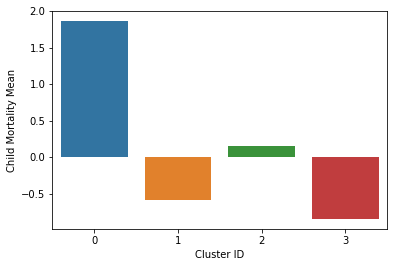

In [61]:
sns.barplot(x=hcluster_df['Cluster ID'],y=hcluster_df['Child Mortality Mean'])

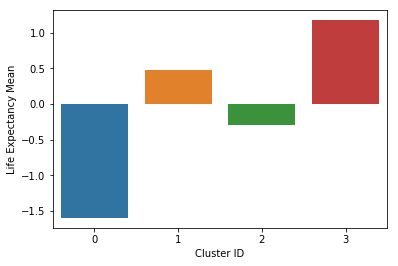

In [62]:
sns.barplot(x=hcluster_df['Cluster ID'],y=hcluster_df['Life Expectancy Mean'])

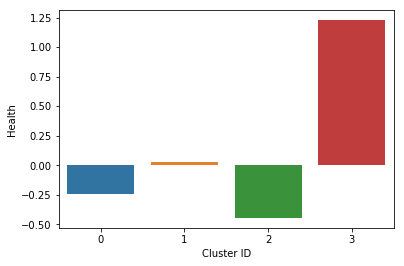

In [63]:
sns.barplot(x=hcluster_df['Cluster ID'],y=hcluster_df['Health'])

### 2-D Visualisations of the clusters of our datapoints in both K-means and Hierarchichal

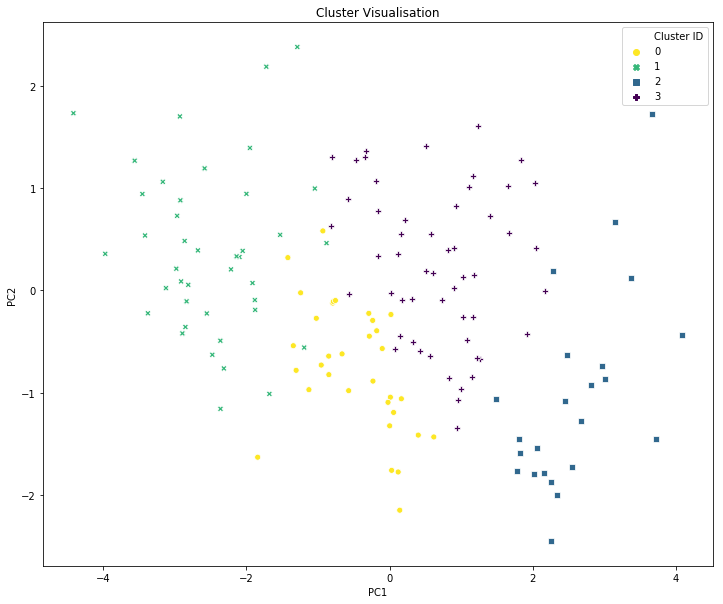

In [94]:
#K-means
plt.figure(figsize=(12,10))
plt.title("Cluster Visualisation")
sns.scatterplot(x='PC1',y='PC2',data=df_km,hue='Cluster ID',palette='viridis_r',style='Cluster ID')

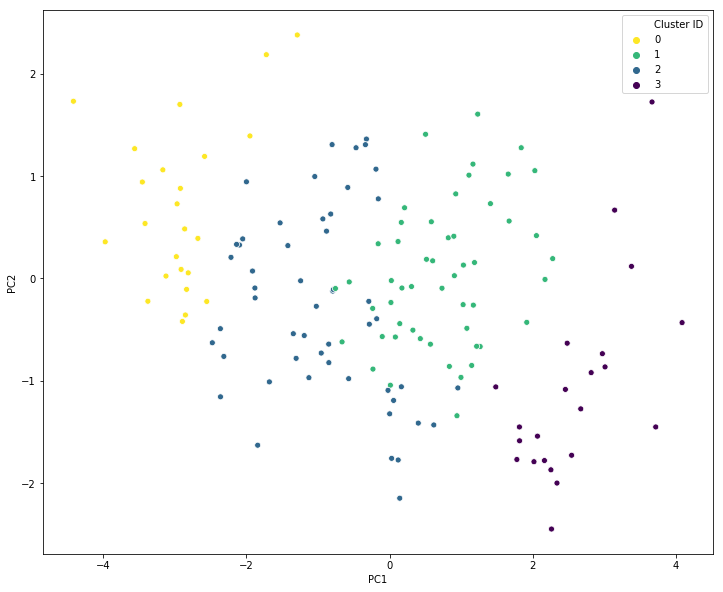

In [95]:
#Hierarchical
plt.figure(figsize=(12,10))
sns.scatterplot(x='PC1',y='PC2',data=df_hc,hue='Cluster ID',palette='viridis_r')

### I have chosen clusters generated from K-means as our final clusters due to better visualisation

### Visualising the behaviour of formed clusters based on different original variables

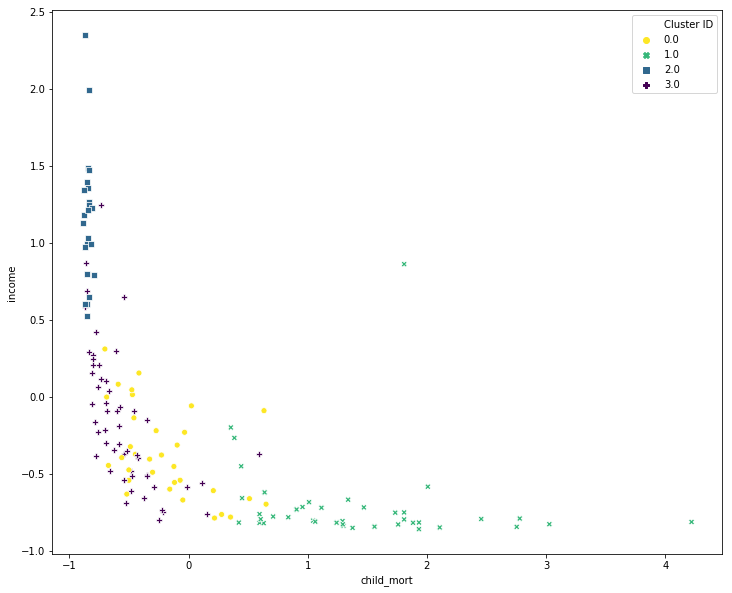

In [66]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='child_mort',y='income',data=Final_df,hue='Cluster ID',palette='viridis_r',style='Cluster ID')

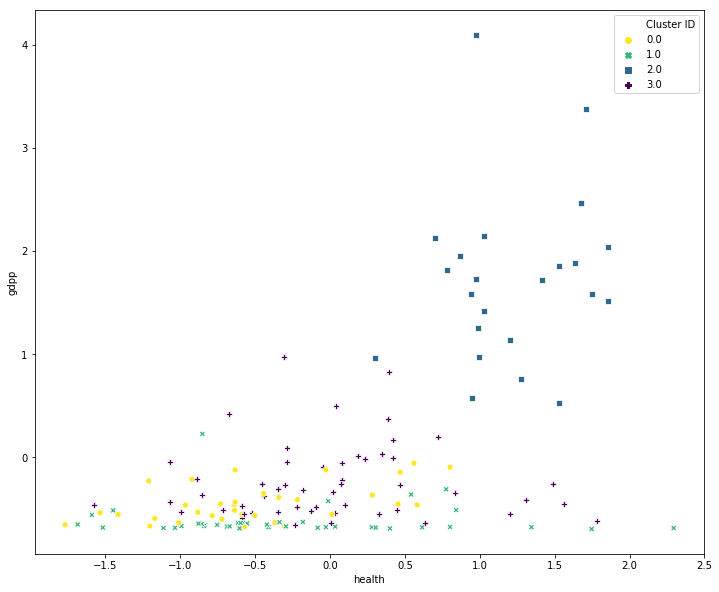

In [67]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='health',y='gdpp',data=Final_df,hue='Cluster ID',palette='viridis_r',style='Cluster ID')

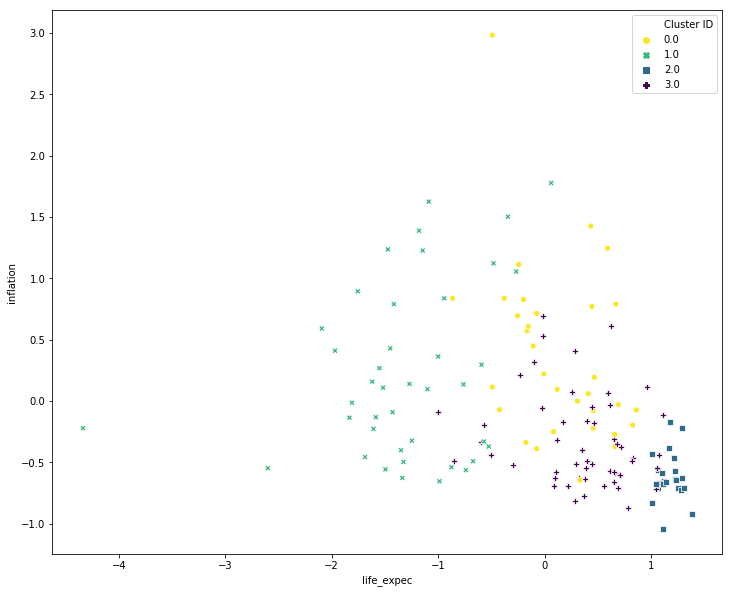

In [68]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='life_expec',y='inflation',data=Final_df,hue='Cluster ID',palette='viridis_r',style='Cluster ID')

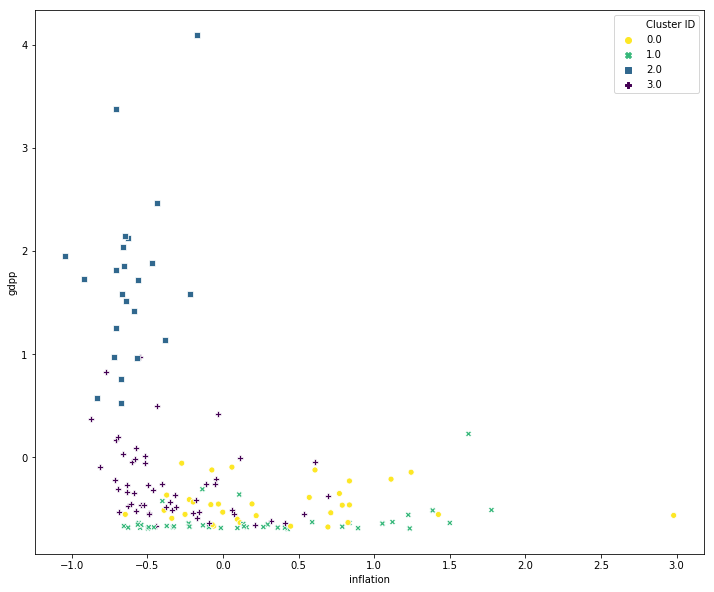

In [69]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='inflation',y='gdpp',data=Final_df,hue='Cluster ID',palette='viridis_r',style='Cluster ID')

### Assigning outliers to their closest clusters
#### First lets do the initial treatment of data

In [70]:
# Dataframe modifications for assigning outliers
df_of_outliers=Final_df[Final_df.isnull().any(axis=1)].iloc[:,6:]

In [71]:
df_of_outliers.shape

(17, 9)

In [72]:
df_of_outliers # Rows that were removed due to being an outlier

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
81,0.607589,-1.017533,1.637446,1.367601,-0.802002,-0.594158,-1.111564,0.591023,-0.627904
82,-0.683199,0.936378,-1.528404,-0.683193,3.020526,0.324335,0.862156,-0.488942,1.397406
87,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415
88,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547
91,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
101,0.043025,-0.644314,2.696381,1.413174,-0.718236,-0.377819,-0.581479,0.339252,-0.552933
113,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936
115,-0.660815,0.899787,-1.477283,-0.235747,1.464877,0.741831,0.625310,-0.031779,0.346718


In [73]:
df.iloc[list(set(list(df.index))&set(list(df_of_outliers.index))),:1].sort_index() # Extracting the country names of the outliers

,country
23,Brunei
81,Kiribati
82,Kuwait
87,Lesotho
88,Liberia
91,Luxembourg
98,Malta
101,"Micronesia, Fed. Sts."
113,Nigeria
115,Oman


In [74]:
df_outlier_countries=df.iloc[list(set(list(df.index))&set(list(df_of_outliers.index))),:1].sort_index() #Creating an instance

In [75]:
# Final outlier dataframe
F_O_D=pd.merge(df_outlier_countries,df_of_outliers,how='outer',left_index=True,right_index=True)
F_O_D

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
81,Kiribati,0.607589,-1.017533,1.637446,1.367601,-0.802002,-0.594158,-1.111564,0.591023,-0.627904
82,Kuwait,-0.683199,0.936378,-1.528404,-0.683193,3.020526,0.324335,0.862156,-0.488942,1.397406
87,Lesotho,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415
88,Liberia,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547
91,Luxembourg,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,Malta,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
101,"Micronesia, Fed. Sts.",0.043025,-0.644314,2.696381,1.413174,-0.718236,-0.377819,-0.581479,0.339252,-0.552933
113,Nigeria,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936
115,Oman,-0.660815,0.899787,-1.477283,-0.235747,1.464877,0.741831,0.625310,-0.031779,0.346718


In [76]:
#Creating a dataframe of the principal components of outliers from the already created PC dataframe of the entire original dataset
df_pc_outliers=df_pca.iloc[list(set(list(df_pca.index))&set(list(df_of_outliers.index))),1:].sort_index()

In [77]:
df_pc_outliers

,PC1,PC2,PC3,PC4
23,2.459953,0.021044,-3.074741,0.860320
81,-1.239107,0.367490,2.435513,0.525576
82,2.463398,0.082795,-2.741979,0.798283
87,-1.803591,2.042345,2.594980,0.998154
88,-1.771653,1.056052,2.498521,1.101975
91,6.918224,4.854921,-0.926665,3.150200
98,3.684916,4.783835,1.170379,-0.574644
101,-0.376569,0.111981,2.857371,0.669839
113,-4.878925,0.040809,-5.590269,2.350105
115,1.128562,0.495996,-2.166082,-0.124911


In [78]:
# Main outlier dataframe with principal components
M_O_D_PC=pd.merge(df_pc_outliers,F_O_D,how='outer',left_index=True,right_index=True)
M_O_D_PC

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,2.459953,0.021044,-3.074741,0.860320,Brunei,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291
81,-1.239107,0.367490,2.435513,0.525576,Kiribati,0.607589,-1.017533,1.637446,1.367601,-0.802002,-0.594158,-1.111564,0.591023,-0.627904
82,2.463398,0.082795,-2.741979,0.798283,Kuwait,-0.683199,0.936378,-1.528404,-0.683193,3.020526,0.324335,0.862156,-0.488942,1.397406
87,-1.803591,2.042345,2.594980,0.998154,Lesotho,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415
88,-1.771653,1.056052,2.498521,1.101975,Liberia,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547
91,6.918224,4.854921,-0.926665,3.150200,Luxembourg,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507
98,3.684916,4.783835,1.170379,-0.574644,Malta,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220
101,-0.376569,0.111981,2.857371,0.669839,"Micronesia, Fed. Sts.",0.043025,-0.644314,2.696381,1.413174,-0.718236,-0.377819,-0.581479,0.339252,-0.552933
113,-4.878925,0.040809,-5.590269,2.350105,Nigeria,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936
115,1.128562,0.495996,-2.166082,-0.124911,Oman,-0.660815,0.899787,-1.477283,-0.235747,1.464877,0.741831,0.625310,-0.031779,0.346718


#### Finding the mean of PCs of all the clusters to compute their distances from the outliers

In [79]:
pc_mean=pd.merge((pd.DataFrame(df_km.groupby('Cluster ID').PC1.mean())),pd.DataFrame(df_km.groupby('Cluster ID').PC2.mean()),left_index=True,right_index=True)
pc_mean.columns=['PC1 Mean','PC2 Mean']

In [80]:
KMcluster_pc_mean=pc_mean.reset_index()

In [81]:
KMcluster_pc_mean #Clusters with their respective cluster cenres 

,Cluster ID,PC1 Mean,PC2 Mean
0,0,-0.492660,-0.748477
1,1,-2.495273,0.381733
2,2,2.575609,-1.030375
3,3,0.674141,0.239271


### Computing the euclidean distances of the points in Main outlier dataframe(M_O_D_PC) from the cluster centres mentioned in (KMcluster_pc_mean) above

In [82]:
import math
list_clusterID=[]
for i in M_O_D_PC.index:
    dist=[]
    for k in range(len(KMcluster_pc_mean.index)):
        #Adding the 4 distances of the data point from the cluster centres to the list
        dist.append(math.sqrt(abs(((M_O_D_PC.loc[i,'PC1'])-(KMcluster_pc_mean.loc[k,'PC1 Mean']))*2+((M_O_D_PC.loc[i,'PC2'])-(KMcluster_pc_mean.loc[k,'PC2 Mean']))*2)))
    print("Distance of the outlier from the four cluster centres :", dist)
    #Adding the index of the minimum distance in the list as that would also correspond to the respective cluster centre
    list_clusterID.append(np.argmin(dist))
print("Cluster IDs w.r.t minimum distance of cluster centres from respective outliers are :", list_clusterID)                          

Distance of the outlier from the four cluster centres : [2.7284186069526393, 3.0313483587833177, 1.3680373186194974, 1.7706404756415097]
Distance of the outlier from the four cluster centres : [0.8596754763124219, 1.5760224307115434, 2.198567730377385, 1.8894598371525124]
Distance of the outlier from the four cluster centres : [2.7522098736626712, 3.052779711380962, 1.4148912322353762, 1.8070857168106078]
Distance of the outlier from the four cluster centres : [1.7204016653838714, 2.1690059169556295, 1.6164653102909932, 1.1616017004678456]
Distance of the outlier from the four cluster centres : [1.0252184146507226, 1.672087789343572, 2.1264216872226487, 1.8050007210653538]
Distance of the outlier from the four cluster centres : [5.101819684130805, 5.270044484339529, 4.522811304902604, 4.660414540424399]
Distance of the outlier from the four cluster centres : [4.406787664483083, 4.6004980488391904, 3.7211605085256014, 3.8872454410616886]
Distance of the outlier from the four cluster cen

In [83]:
# Adding the cluster labels to outliers
k=pd.DataFrame(pd.Series(list_clusterID))

In [84]:
# Providing same index number for merging the data
k.index=M_O_D_PC.index

In [85]:
M_O_D_PC['Cluster ID']=k[0]

In [86]:
M_O_D_PC

,PC1,PC2,PC3,PC4,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
23,2.459953,0.021044,-3.074741,0.860320,Brunei,-0.690660,0.961991,-1.451722,-0.782625,3.301480,0.846206,0.738094,-0.734087,1.222291,2
81,-1.239107,0.367490,2.435513,0.525576,Kiribati,0.607589,-1.017533,1.637446,1.367601,-0.802002,-0.594158,-1.111564,0.591023,-0.627904,0
82,2.463398,0.082795,-2.741979,0.798283,Kuwait,-0.683199,0.936378,-1.528404,-0.683193,3.020526,0.324335,0.862156,-0.488942,1.397406,2
87,-1.803591,2.042345,2.594980,0.998154,Lesotho,1.527804,-0.062532,1.564416,2.241778,-0.768184,-0.344609,-2.713097,0.233243,-0.645415,3
88,-1.771653,1.056052,2.498521,1.101975,Liberia,1.269149,-0.805310,1.820021,1.893764,-0.855591,-0.219360,-1.100286,1.372838,-0.691547,0
91,6.918224,4.854921,-0.926665,3.150200,Luxembourg,-0.882164,4.899083,0.348467,3.940415,3.878996,-0.394898,1.211786,-0.873224,5.036507,2
98,3.684916,4.783835,1.170379,-0.574644,Malta,-0.782681,4.094101,0.669799,4.437577,0.580393,-0.374972,1.099002,-1.052114,0.445220,2
101,-0.376569,0.111981,2.857371,0.669839,"Micronesia, Fed. Sts.",0.043025,-0.644314,2.696381,1.413174,-0.718236,-0.377819,-0.581479,0.339252,-0.552933,0
113,-4.878925,0.040809,-5.590269,2.350105,Nigeria,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936,1
115,1.128562,0.495996,-2.166082,-0.124911,Oman,-0.660815,0.899787,-1.477283,-0.235747,1.464877,0.741831,0.625310,-0.031779,0.346718,2


#### Cluster IDs have been successfuly added to the outliers

### Joining the two dataframes(Outlier,Normal) horizontally to obtain final dataset with cluster values for all

In [87]:
df=pd.concat((M_O_D_PC,Final_df[~Final_df.isnull().any(axis=1)]),axis=0).sort_index()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [88]:
df.head() # Dataframe with cluster values assignedd to all counntries that were present in raw data

,Cluster ID,PC1,PC2,PC3,PC4,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
0,1.0,-2.913787,0.088354,0.721003,0.996699,1.291532,Afghanistan,-1.138280,-0.679180,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,3.0,0.429358,-0.587859,0.321052,-1.171193,-0.538949,Albania,-0.479658,-0.485623,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,0.0,-0.282988,-0.446657,-1.225135,-0.850127,-0.272833,Algeria,-0.099122,-0.465376,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,1.0,-2.930969,1.699437,-1.521734,0.875966,2.007808,Angola,0.775381,-0.516268,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,3.0,1.031988,0.130488,0.192922,-0.844808,-0.695634,Antigua and Barbuda,0.160668,-0.041817,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


### Visualisations with outliers

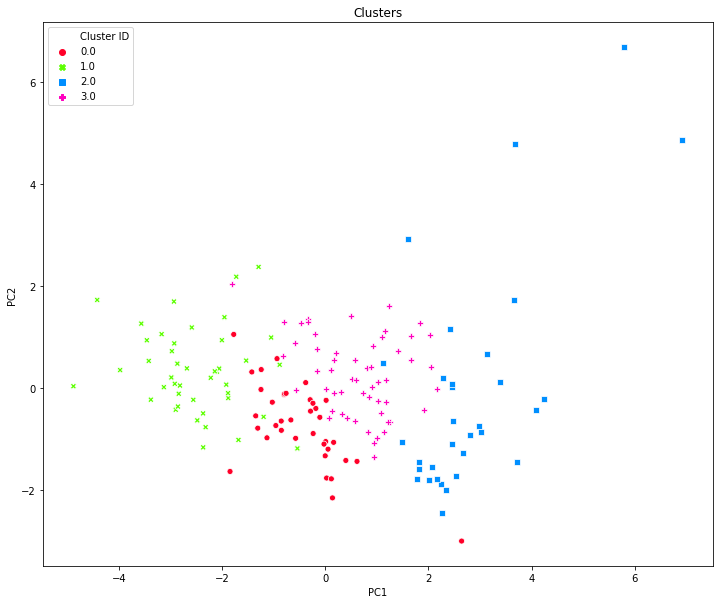

In [89]:
plt.figure(figsize=(12,10))
plt.title("Clusters")
sns.scatterplot(x='PC1',y='PC2',data=df,hue='Cluster ID',palette='gist_rainbow',style='Cluster ID')

## List of countries under various clusters

In [90]:
#Cluster 1
df.loc[df['Cluster ID']==0,'country']

2                    Algeria
5                  Argentina
6                    Armenia
9                 Azerbaijan
12                Bangladesh
19                   Bolivia
22                    Brazil
34                     China
35                  Colombia
45        Dominican Republic
46                   Ecuador
47                     Egypt
55                     Gabon
62                 Guatemala
69                     India
70                 Indonesia
71                      Iran
72                      Iraq
76                   Jamaica
79                Kazakhstan
81                  Kiribati
88                   Liberia
101    Micronesia, Fed. Sts.
103                 Mongolia
105                  Morocco
107                  Myanmar
109                    Nepal
119                     Peru
120              Philippines
125                   Russia
140                Sri Lanka
146               Tajikistan
151                    Tonga
153                   Turkey
159           

In [91]:
#Cluster 2
df.loc[df['Cluster ID']==1,'country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
84                          Lao
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112                       Niger
113                     Nigeria
116                    Pakistan
126     

In [92]:
#Cluster 3
df.loc[df['Cluster ID']==2,'country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
131              Seychelles
133               Singapore
135                Slovenia
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
Name: country, dtype: object

In [93]:
#Cluster 4
df.loc[df['Cluster ID']==3,'country']

1                             Albania
4                 Antigua and Barbuda
10                            Bahamas
11                            Bahrain
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
20             Bosnia and Herzegovina
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
39                         Costa Rica
41                            Croatia
42                             Cyprus
43                     Czech Republic
48                        El Salvador
51                            Estonia
52                               Fiji
57                            Georgia
61                            Grenada
65                             Guyana
67                            Hungary
78                             Jordan
83                    Kyrgyz Republic
85          

## END